# DS3000 Battery Analyzer – Exploratory Data Analysis

Use this notebook to explore the merged 1 Hz dataset, define overheating labels, and document findings per Milestone 2.

## 1. Objectives
- Summarize inverter electrical/thermal behavior
- Identify anomalies or data quality issues
- Prototype overheating labels/targets
- Capture insights for modeling teams

In [4]:
# 2. Imports & Configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use("seaborn-v0_8")
pd.set_option("display.max_columns", 50)

# Load merged dataset
data_path = Path("clean/inverter_merged_1hz.csv")
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.sort_values("timestamp", inplace=True)
df.head()

,dc_raw_sample_count,inv_control_board_temp_count,inv_control_board_temp_max,inv_control_board_temp_mean,inv_control_board_temp_min,inv_coolant_temp_count,inv_coolant_temp_max,inv_coolant_temp_mean,inv_coolant_temp_min,inv_dc_bus_current_count,inv_dc_bus_current_max,inv_dc_bus_current_mean,inv_dc_bus_current_min,inv_dc_bus_voltage_count,inv_dc_bus_voltage_max,inv_dc_bus_voltage_mean,inv_dc_bus_voltage_min,inv_gate_driver_board_temp_count,inv_gate_driver_board_temp_max,inv_gate_driver_board_temp_mean,inv_gate_driver_board_temp_min,inv_hot_spot_temp_count,inv_hot_spot_temp_max,inv_hot_spot_temp_mean,inv_hot_spot_temp_min,...,inv_module_a_temp_mean,inv_module_a_temp_min,inv_module_b_temp_count,inv_module_b_temp_max,inv_module_b_temp_mean,inv_module_b_temp_min,inv_module_c_temp_count,inv_module_c_temp_max,inv_module_c_temp_mean,inv_module_c_temp_min,inv_phase_a_current_count,inv_phase_a_current_max,inv_phase_a_current_mean,inv_phase_a_current_min,inv_phase_b_current_count,inv_phase_b_current_max,inv_phase_b_current_mean,inv_phase_b_current_min,inv_phase_c_current_count,inv_phase_c_current_max,inv_phase_c_current_mean,inv_phase_c_current_min,phase_raw_sample_count,temps_raw_sample_count,timestamp
0,4.0,4.0,30.0,29.9250,29.9,4.0,2.1,1.95000,1.8,4.0,0.0,0.0,0.0,4.0,0.060,0.03750,0.0,4.0,13.4,11.3500,9.3,4.0,2.1,1.95000,1.8,...,11.5250,9.5,4.0,13.6,11.525,9.5,4.0,13.6,11.525,9.5,4.0,-0.050,-0.13000,-0.20,4.0,0.400,0.01250,-0.250,4.0,0.2000,0.09375,0.04,4.0,4.0,2025-06-03 18:56:10
1,10.0,10.0,30.5,30.3900,30.2,10.0,4.3,3.21000,2.3,10.0,0.0,0.0,0.0,10.0,0.050,0.02333,0.0,10.0,27.0,20.8800,14.8,10.0,4.3,3.21000,2.3,...,21.0400,14.9,10.0,27.2,21.040,14.9,10.0,27.2,21.040,14.9,10.0,0.040,-0.14567,-0.48,10.0,0.175,-0.05620,-0.340,10.0,0.0833,-0.07967,-0.52,10.0,10.0,2025-06-03 18:56:11
2,10.0,10.0,30.8,30.7100,30.6,10.0,7.5,6.07000,4.6,10.0,0.0,0.0,0.0,10.0,0.050,0.02000,0.0,10.0,33.8,32.2400,28.4,10.0,7.5,6.07000,4.6,...,30.7800,28.5,10.0,31.2,30.580,28.5,10.0,29.7,29.380,28.3,10.0,0.280,-0.04930,-0.32,10.0,0.200,-0.08067,-0.320,10.0,0.2000,-0.00133,-0.22,10.0,10.0,2025-06-03 18:56:12
3,10.0,8.0,31.0,30.8625,30.7,8.0,10.1,8.99375,7.8,10.0,0.0,0.0,0.0,10.0,0.060,0.03433,0.0,8.0,34.2,34.0375,33.8,8.0,10.1,8.99375,7.8,...,31.7125,31.6,8.0,31.6,31.450,31.3,8.0,29.8,29.775,29.7,10.0,0.150,-0.05767,-0.24,10.0,0.350,0.03670,-0.183,10.0,0.2250,0.01317,-0.14,10.0,9.0,2025-06-03 18:56:13
4,10.0,10.0,31.0,30.8900,30.8,10.0,12.7,11.58000,10.4,10.0,0.0,0.0,0.0,10.0,0.075,0.03417,0.0,10.0,34.4,34.2200,34.1,10.0,12.7,11.58000,10.4,...,31.7800,31.7,10.0,31.7,31.680,31.6,10.0,30.1,30.000,29.9,10.0,0.325,0.04420,-0.30,10.0,0.300,-0.52400,-5.550,10.0,0.1400,-0.08500,-0.30,10.0,10.0,2025-06-03 18:56:14


## 3. Summary Statistics & Missingness

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
dc_raw_sample_count,3324.0,9.922082,1.0,10.0,10.0,10.0,10.0,0.589
inv_control_board_temp_count,3324.0,9.480144,1.0,9.0,10.0,10.0,10.0,0.979121
inv_control_board_temp_max,3324.0,48.38926,30.0,44.8,51.4,53.0,55.0,6.324102
inv_control_board_temp_mean,3324.0,48.278239,29.925,44.694375,51.331667,52.89,54.87,6.327077
inv_control_board_temp_min,3324.0,48.166215,29.9,44.575,51.2,52.8,54.8,6.333108
inv_coolant_temp_count,3324.0,9.472924,1.0,9.0,10.0,10.0,10.0,0.985077
inv_coolant_temp_max,3324.0,45.068622,2.1,43.1,47.1,48.9,63.6,7.281741
inv_coolant_temp_mean,3324.0,44.986248,1.95,43.035625,47.1,48.8825,63.59,7.373497
inv_coolant_temp_min,3324.0,44.903309,1.8,43.0,47.1,48.8,63.5,7.468794
inv_dc_bus_current_count,3324.0,9.921179,1.0,10.0,10.0,10.0,10.0,0.593715


In [6]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

inv_module_a_temp_max               1
inv_module_b_temp_max               1
inv_module_a_temp_min               1
inv_module_a_temp_mean              1
inv_module_b_temp_mean              1
inv_module_a_temp_count             1
inv_module_b_temp_min               1
inv_module_c_temp_count             1
inv_module_c_temp_max               1
inv_module_c_temp_mean              1
inv_gate_driver_board_temp_min      1
inv_gate_driver_board_temp_mean     1
inv_gate_driver_board_temp_max      1
inv_gate_driver_board_temp_count    1
inv_module_c_temp_min               1
inv_module_b_temp_count             1
dtype: int64

## 4. Time-Series Exploration

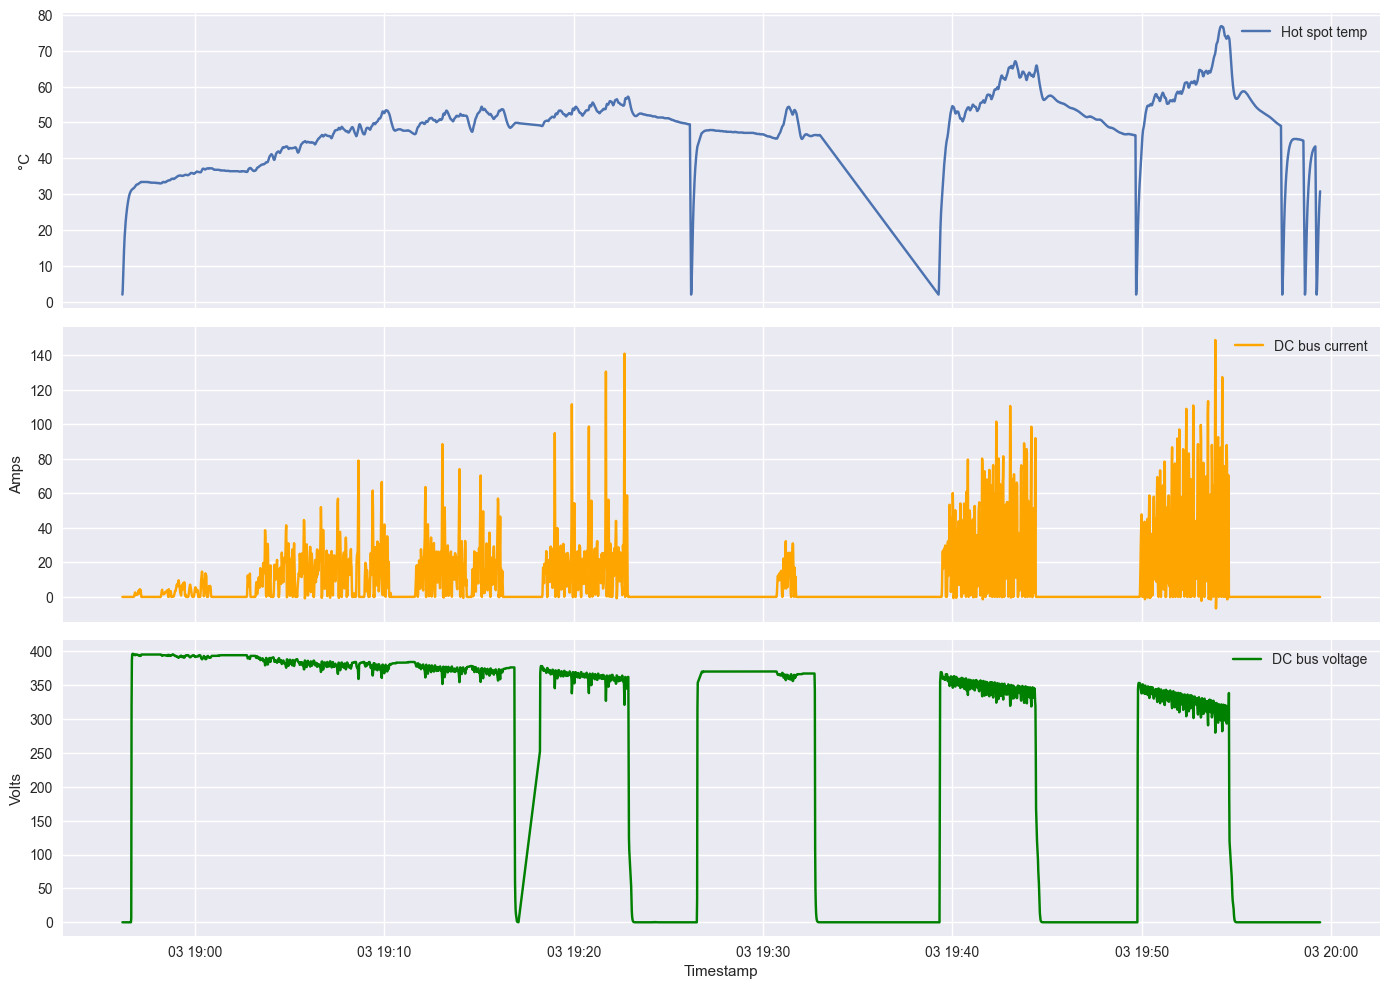

In [7]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
axes[0].plot(df["timestamp"], df["inv_hot_spot_temp_mean"], label="Hot spot temp")
axes[0].set_ylabel("°C")
axes[0].legend()

axes[1].plot(df["timestamp"], df["inv_dc_bus_current_mean"], color="orange", label="DC bus current")
axes[1].set_ylabel("Amps")
axes[1].legend()

axes[2].plot(df["timestamp"], df["inv_dc_bus_voltage_mean"], color="green", label="DC bus voltage")
axes[2].set_ylabel("Volts")
axes[2].set_xlabel("Timestamp")
axes[2].legend()
plt.tight_layout()

## 5. Correlations

Text(0.5, 1.0, 'Correlation heatmap of mean features')

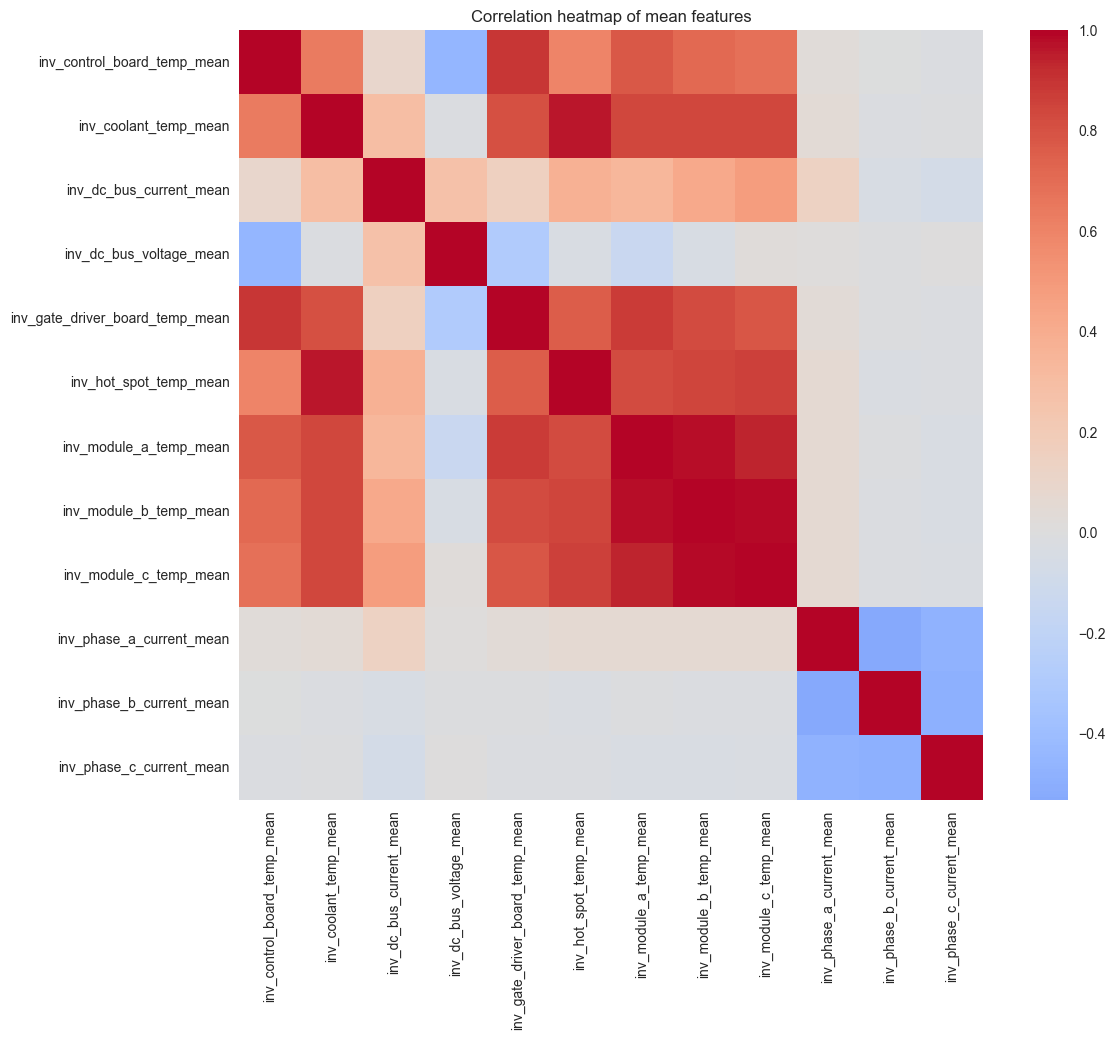

In [8]:
mean_cols = [c for c in df.columns if c.endswith("_mean")]
corr = df[mean_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap of mean features")

## 6. Label Prototyping

In [9]:
HOTSPOT_THRESHOLD = 65.0
df["overheat_label"] = (df["inv_hot_spot_temp_mean"] >= HOTSPOT_THRESHOLD).astype(int)
df["overheat_label"].value_counts(normalize=True)

overheat_label
0    0.970517
1    0.029483
Name: proportion, dtype: float64

In [10]:
HORIZON = 30  # seconds
df["hotspot_future_delta"] = df["inv_hot_spot_temp_mean"].shift(-HORIZON) - df["inv_hot_spot_temp_mean"]
df[["hotspot_future_delta"]].describe()

,hotspot_future_delta
count,3294.000000
mean,0.084104
std,6.977537
min,-49.110000
25%,-1.038333
50%,-0.100000
75%,1.600000
max,50.570000


## 7. Findings & Next Steps
Summarize key trends, anomalies, and candidate thresholds here.